### Group 1

#### Amrutha C 23PGAI0030
#### Muskan Rath 23PGAI0019
#### Neha Rupesh Thakur 23PGAI0064
#### Tanuja Tanushree 23PGAI0104

### Problem Statement

Here we have a dataset with elctricity production across months over the years. Build different models to forecast electricity production and compare them. The data is classified in data and electricity produced per month

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import itertools
import warnings
warnings.filterwarnings("ignore")

### Load Data

Load electricity production data as a dataframe using pandas library. Rename the column names and then convert date to date-time format. Set date as index to create a time series dataset.

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/nehathakur123/fastapi/main/Electric_Production.csv')
data

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
...,...,...
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212


In [3]:
data.columns=['Date','Value']
data

,Date,Value
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
...,...,...
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212


In [4]:
data['Date']=pd.to_datetime(data['Date'])
data

,Date,Value
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151
...,...,...
392,2017-09-01,98.6154
393,2017-10-01,93.6137
394,2017-11-01,97.3359
395,2017-12-01,114.7212


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    397 non-null    datetime64[ns]
 1   Value   397 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


In [6]:
data.set_index('Date',inplace=True)
data

,Value
Date,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


In [7]:
data.isnull().sum()

Value    0
dtype: int64

In [8]:
data.head(50)

,Value
Date,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
1985-06-01,58.0904
1985-07-01,62.6202
1985-08-01,63.2485
1985-09-01,60.5846


In [9]:
plt.rcParams['figure.figsize']=(20,6)

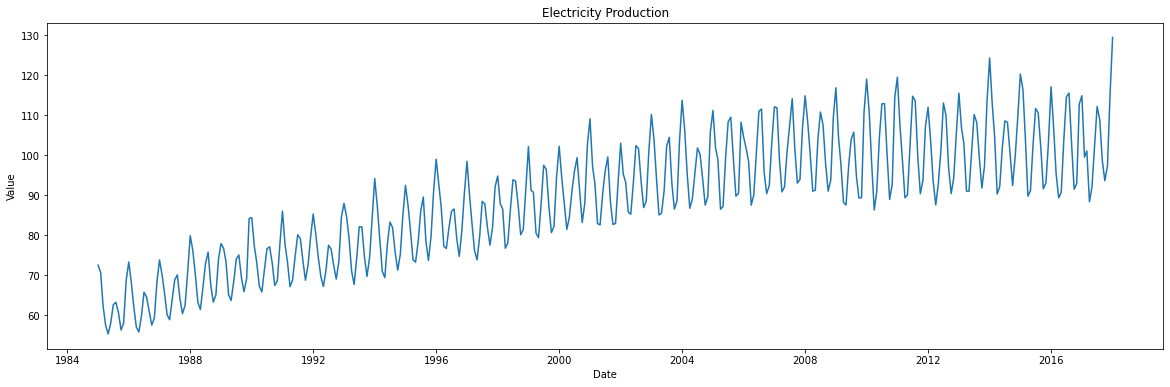

In [10]:
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Electricity Production')
plt.plot(data)

From the above plot, we can see that there is seasonality and trend.From both the data and the plot we can see that there is a seasonality of 12 months. There are two ways to check the stationarity of data. We have used rolling statistics and ADCF.

### Test for Stationarity

#### Rolling Statistics

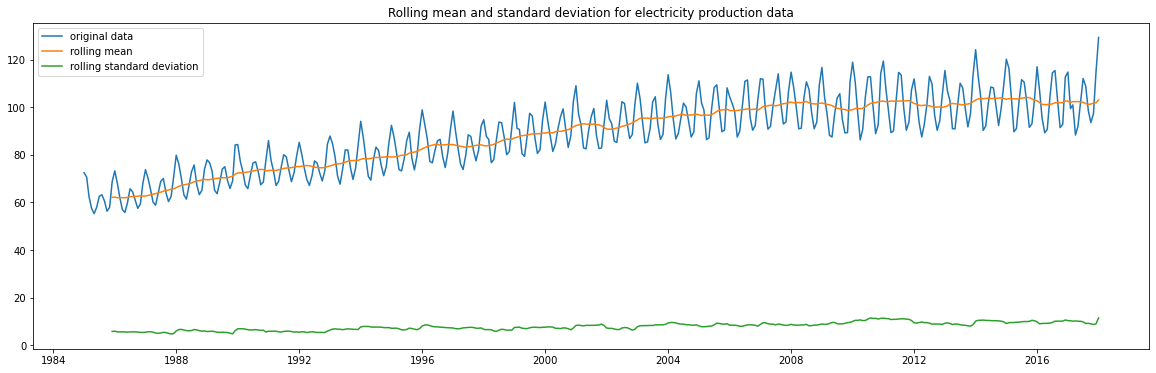

In [11]:
rollingMean=data.rolling(window=12).mean()
rollingStd=data.rolling(window=12).std()

#Plot
original_dat=plt.plot(data,label='original data')
mean=plt.plot(rollingMean,label='rolling mean')
std=plt.plot(rollingStd,label='rolling standard deviation')
plt.legend(loc='best')
plt.title('Rolling mean and standard deviation for electricity production data')
plt.show()

Rolling statistics test is visual in nature. Here we have rolling mean in orange and rolling standard deviation in green. Here we can see that mean is not constant. So we can conclude that data is not stationary.

#### Augmented Dickey Fuller Test

Null Hypothesis, H0: Time series is non-stationary

Alternate Hypothesis, H1: Time series is stationary

In [12]:
def adfullerTest(seriesData):
    result = adfuller(seriesData, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'n_lags: {result[1]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print('Critial Values:')
        print(f'   {key}, {value}')

        
adfullerTest(data)

ADF Statistic: -2.2569903500472366
n_lags: 0.18621469116587053
p-value: 0.18621469116587053
Critial Values:
   1%, -3.4476305904172904
Critial Values:
   5%, -2.869155980820355
Critial Values:
   10%, -2.570827146203181


In [13]:
def test_stationarity(seriesData):
    rollingMean=seriesData.rolling(window=12).mean()
    rollingStd=seriesData.rolling(window=12).std()
    
    ori=plt.plot(seriesData,label='original')
    mean=plt.plot(rollingMean,label='rollingMean')
    std=plt.plot(rollingStd,label='rollingStd')
    plt.legend(loc='best')
    plt.title('Rolling mean and standard deviation for time series data')
    plt.show()
    
    from statsmodels.tsa.stattools import adfuller
    
    result = adfuller(seriesData, autolag='AIC')
    outputResult = pd.Series(result[0:4], index=['Test Statistic', "MacKinnon's approx p-value", '#uusedLags','NOBS'])
    
    for key, value in result[4].items():
        outputResult['critical value (%s)'%key] = value
    
    print(outputResult)

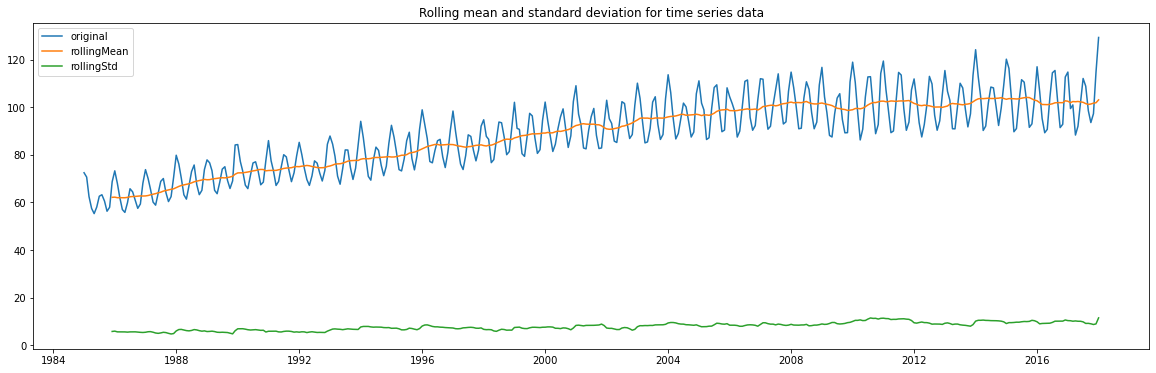

Test Statistic                 -2.256990
MacKinnon's approx p-value      0.186215
#uusedLags                     15.000000
NOBS                          381.000000
critical value (1%)            -3.447631
critical value (5%)            -2.869156
critical value (10%)           -2.570827
dtype: float64


In [14]:
test_stationarity(data)

If p-value is greater than 0.05, null hypothesis is failed to be rejected. Here, p-value is much higher than threshold, i.e., null hypothesis is failed to reject. It shows Time series is non-stationary.

To suppress or flatten the variance, use log scale of the value

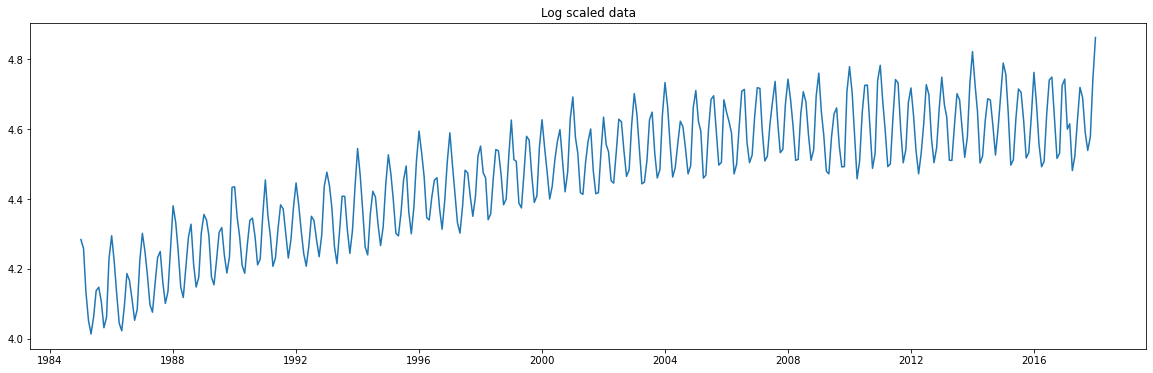

In [15]:
data_log_scaled = np.log(data)
plt.title('Log scaled data')
plt.plot(data_log_scaled)

Plotting moving average and moving standard deviation for the log scaled data

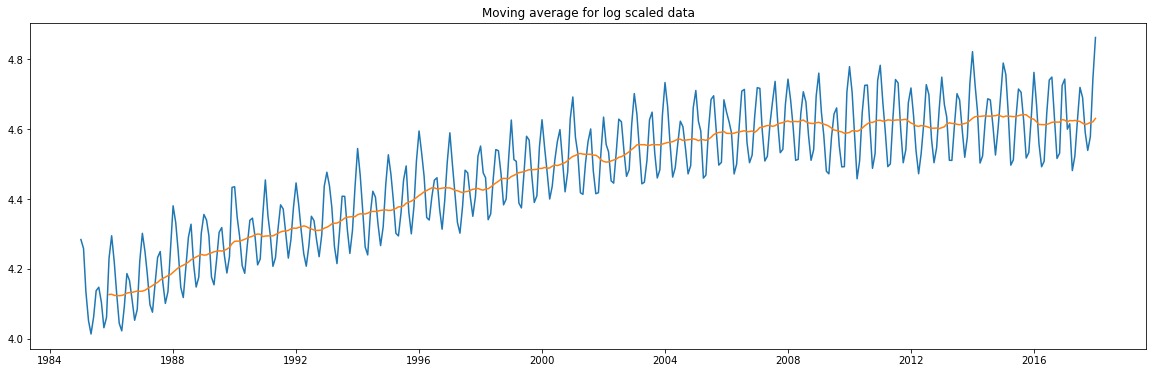

In [16]:
movingAvg=data_log_scaled.rolling(window=12).mean()
movingStd=data_log_scaled.rolling(window=12).std()
plt.plot(data_log_scaled)
plt.title('Moving average for log scaled data')
plt.plot(movingAvg)

Still it is not stationary. There is trend and seasonality. We are doing the following steps to make the time series stationary.

In [17]:
data_log_scaled_minus_movingAvg = data_log_scaled-movingAvg
data_log_scaled_minus_movingAvg.dropna(inplace=True)
data_log_scaled_minus_movingAvg.head(10)

,Value
Date,
1985-12-01,0.103961
1986-01-01,0.167724
1986-02-01,0.095629
1986-03-01,0.007329
1986-04-01,-0.079115
1986-05-01,-0.101472
1986-06-01,-0.033363
1986-07-01,0.055963
1986-08-01,0.034639


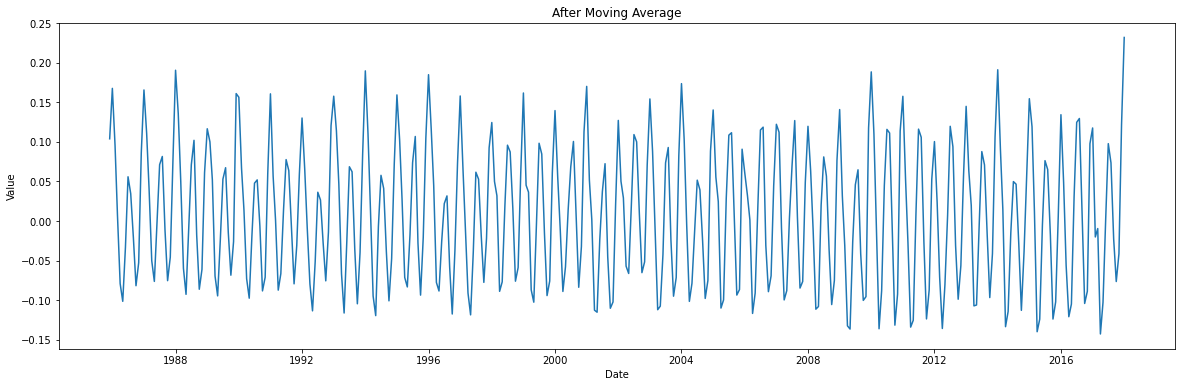

In [18]:
plt.plot(data_log_scaled_minus_movingAvg)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title("After Moving Average")
plt.show()

#### Exponential Decay Transformation

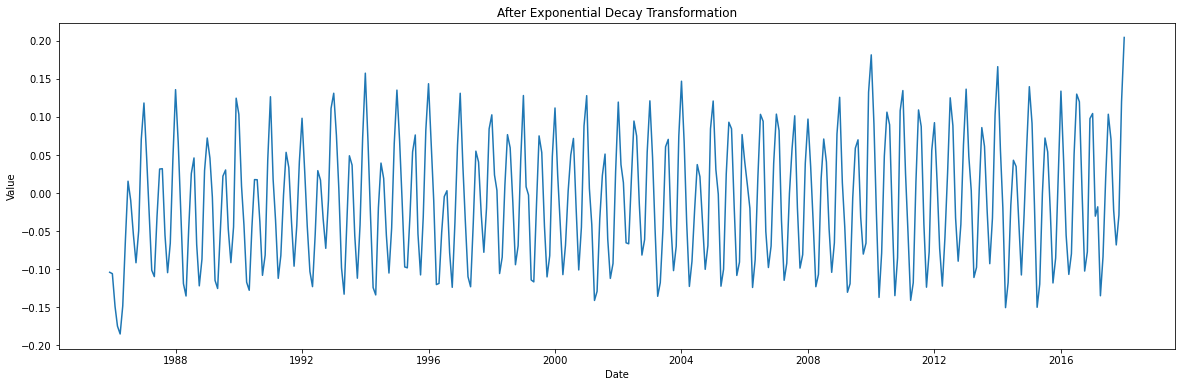

In [19]:
data_log_scaled_minus_movingAvg_exp_decay = data_log_scaled_minus_movingAvg.ewm(halflife=12, min_periods=0, adjust=True).mean()
data_log_scaled_minus_movingAvg_minus_exp_decay = data_log_scaled_minus_movingAvg - data_log_scaled_minus_movingAvg_exp_decay
plt.plot(data_log_scaled_minus_movingAvg_minus_exp_decay - data_log_scaled_minus_movingAvg_exp_decay)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title("After Exponential Decay Transformation")
plt.show()

Test for stationarity again

In [20]:
adfullerTest(data_log_scaled_minus_movingAvg_minus_exp_decay)

ADF Statistic: -7.213159866628946
n_lags: 2.2077706757453696e-10
p-value: 2.2077706757453696e-10
Critial Values:
   1%, -3.4480996560263386
Critial Values:
   5%, -2.8693621113224137
Critial Values:
   10%, -2.570937038891028


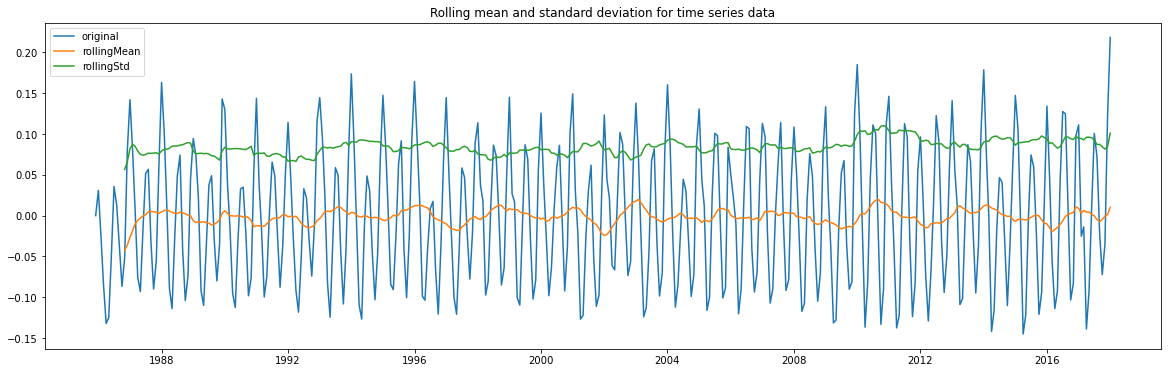

Test Statistic               -7.213160e+00
MacKinnon's approx p-value    2.207771e-10
#uusedLags                    1.400000e+01
NOBS                          3.710000e+02
critical value (1%)          -3.448100e+00
critical value (5%)          -2.869362e+00
critical value (10%)         -2.570937e+00
dtype: float64


In [21]:
test_stationarity(data_log_scaled_minus_movingAvg_minus_exp_decay)

Here the p-value is much smaller than the threshold 0.05. Hence we failed to reject null hypothesis, i.e., Time series is now stationary.

To see the components of time series

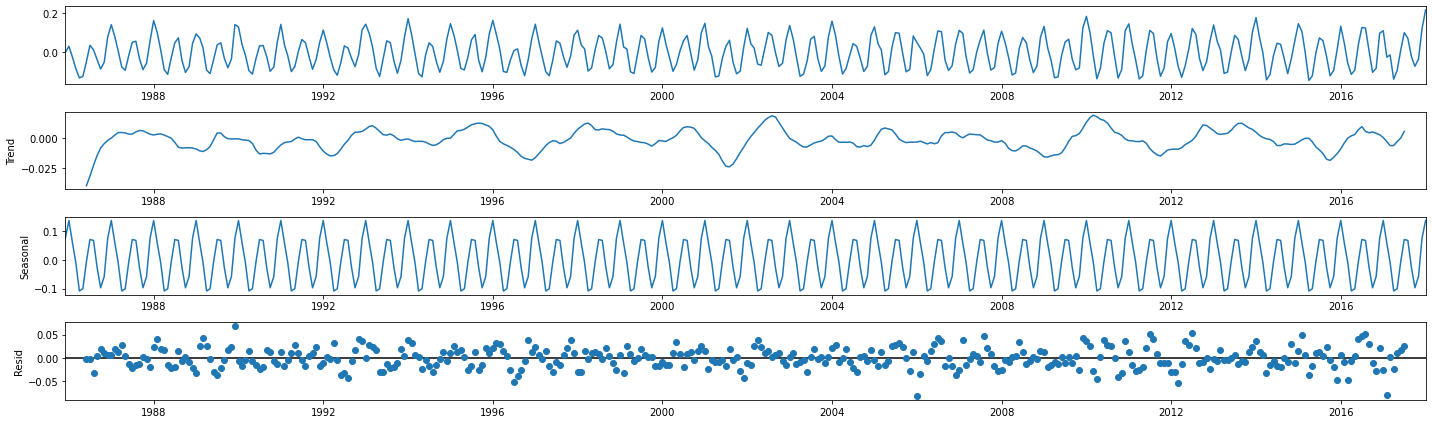

In [22]:
decomposition=seasonal_decompose(data_log_scaled_minus_movingAvg_minus_exp_decay)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

decomposition.plot()
plt.show()

#### ACF and PACF

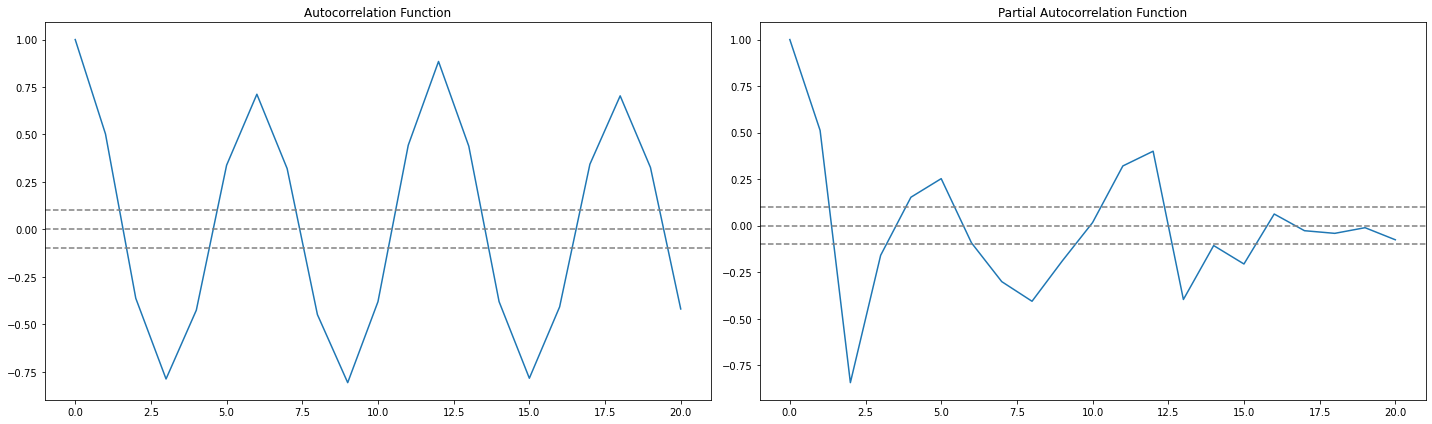

In [23]:
lag_acf = acf(data_log_scaled_minus_movingAvg_minus_exp_decay, nlags=20)
lag_pacf = pacf(data_log_scaled_minus_movingAvg_minus_exp_decay, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_log_scaled_minus_movingAvg_minus_exp_decay)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_log_scaled_minus_movingAvg_minus_exp_decay)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_log_scaled_minus_movingAvg_minus_exp_decay)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_log_scaled_minus_movingAvg_minus_exp_decay)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()   

By looking at both the ACF and PACF graph, we can select the values of p and q for auto regression and moving average model respectively. Also to remove the seasonality, we used first order differencing. To get the minimum value of MSE, we tried different combinations of p,q and d. (p,d,q) = (2,1,2) gives the minimum MSE.So we selected this combination. 

### Model Fitting

#### Autoregression Model

In [24]:
ar_values = data_log_scaled_minus_movingAvg_minus_exp_decay.values
train = data_log_scaled_minus_movingAvg_minus_exp_decay[1:len(data_log_scaled_minus_movingAvg_minus_exp_decay)-30] 
test = data_log_scaled_minus_movingAvg_minus_exp_decay[len(data_log_scaled_minus_movingAvg_minus_exp_decay)-30:]
model = ARIMA(train, order=(2,1,0))
AR_model = model.fit()

predictions = AR_model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
ar_score = mean_squared_error(test, predictions)
print('AR MSE: {}'.format(round(ar_score,4)))

AR MSE: 0.0079


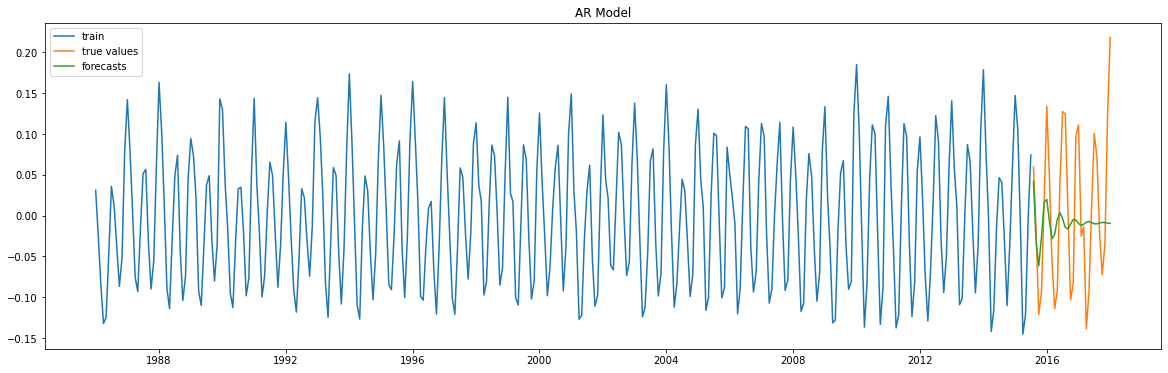

In [25]:
plt.plot(train,label="train")
plt.plot(test, label = "true values")
plt.plot(predictions,label = "forecasts")
plt.title("AR Model")
plt.legend(loc='upper left')
plt.show()

#### Moving Average

In [26]:
model = ARIMA(train, order=(0,1,2))
MovingAvg_model = model.fit()

predictions = MovingAvg_model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
MovingAvg_score = mean_squared_error(test, predictions)
print('Moving Average MSE: {}'.format(round(MovingAvg_score,4)))

Moving Average MSE: 0.0085


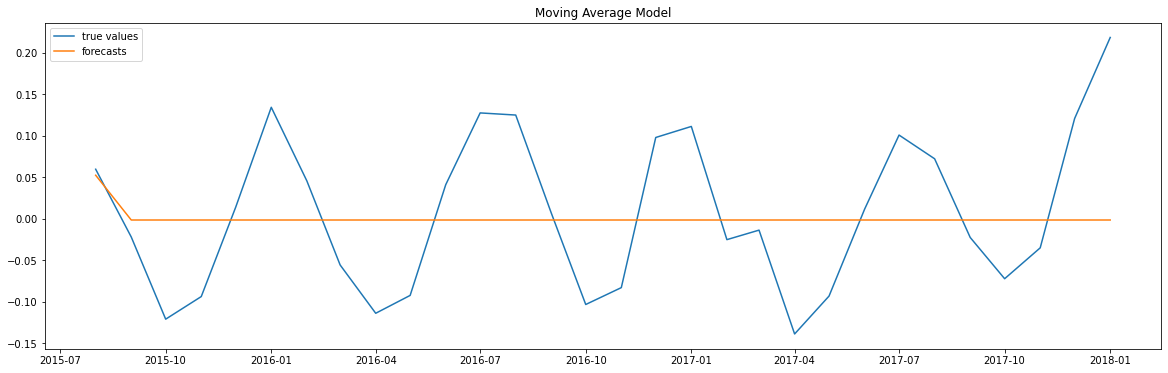

In [27]:
plt.plot(test, label = "true values")
plt.plot(predictions,label = "forecasts")
plt.title("Moving Average Model")
plt.legend(loc = 'upper left')
plt.show()

#### ARIMA 

In [28]:
model = ARIMA(train, order=(2,1,2))
ARIMA_model = model.fit()

predictions = ARIMA_model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
arima_score = mean_squared_error(test, predictions)
print('ARIMA MSE: {}'.format(round(arima_score,4)))

ARIMA MSE: 0.0042


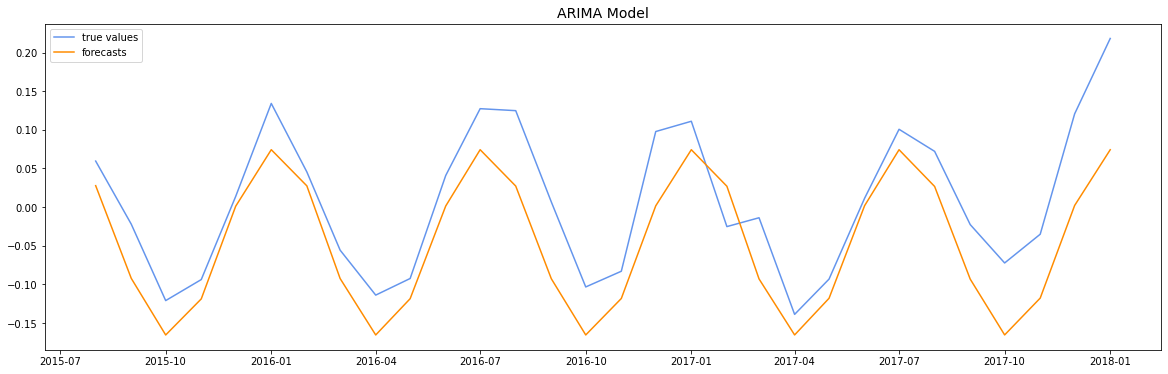

In [29]:
# plt.figure(figsize = (10,6))
plt.plot(test, label = "true values", color = "cornflowerblue")
plt.plot(predictions,label = "forecasts", color='darkorange')
plt.title("ARIMA Model", size = 14)
plt.legend(loc = 'upper left')
plt.show()

In [30]:
model_errors = pd.DataFrame()
model_errors["Model"] = ["Autoregression", "Moving Average", "ARIMA"]
model_errors["MSE"] = [ar_score, MovingAvg_score, arima_score]
model_errors = model_errors.sort_values("MSE", ascending = True, ignore_index = True)
model_errors.index = model_errors.Model
del model_errors["Model"]

model_errors

,MSE
Model,
ARIMA,0.004172
Autoregression,0.007904
Moving Average,0.008520


In [32]:
p=range(0, 2)
d=range(0, 2)
q=range(0, 2)
pdq = list(itertools.product(p, d, q))
combinations = [(i[0], i[1], i[2], 12) for i in list(itertools.product(p, d, q))]
train_df1=data
print('Combination for SARIMA')
print('SARIMA: {} x {}'.format(pdq[1], combinations[1]))
print('SARIMA: {} x {}'.format(pdq[2], combinations[2]))
combinations

Combination for SARIMA
SARIMA: (0, 0, 1) x (0, 0, 1, 12)
SARIMA: (0, 1, 0) x (0, 1, 0, 12)


[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [33]:
train_df=pd.DataFrame(train,columns=['Value'])
test_df=pd.DataFrame(test,columns=['Value'])
for parameter in pdq:
    for seasonal_parameter in combinations:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_df1,order=parameter,seasonal_order=seasonal_parameter,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print(parameter,' x ',seasonal_parameter,' => ',results.aic)
        except:
            
            continue

(0, 0, 0)  x  (0, 0, 0, 12)  =>  4691.4667493072775
(0, 0, 0)  x  (0, 0, 1, 12)  =>  4080.9476251238916
(0, 0, 0)  x  (0, 1, 0, 12)  =>  2088.268212864115
(0, 0, 0)  x  (0, 1, 1, 12)  =>  2030.2661134096597
(0, 0, 0)  x  (1, 0, 0, 12)  =>  2056.914633885044
(0, 0, 0)  x  (1, 0, 1, 12)  =>  2019.7440345171412
(0, 0, 0)  x  (1, 1, 0, 12)  =>  2034.8300266663969
(0, 0, 0)  x  (1, 1, 1, 12)  =>  2031.5791873246144
(0, 0, 1)  x  (0, 0, 0, 12)  =>  4165.484637387415
(0, 0, 1)  x  (0, 0, 1, 12)  =>  3592.1349009403934
(0, 0, 1)  x  (0, 1, 0, 12)  =>  1951.164484343148
(0, 0, 1)  x  (0, 1, 1, 12)  =>  1878.2207233203617
(0, 0, 1)  x  (1, 0, 0, 12)  =>  1941.527483018118
(0, 0, 1)  x  (1, 0, 1, 12)  =>  2092.7080402054994
(0, 0, 1)  x  (1, 1, 0, 12)  =>  1890.6987113536225
(0, 0, 1)  x  (1, 1, 1, 12)  =>  1879.199698346777
(0, 1, 0)  x  (0, 0, 0, 12)  =>  2742.1936343251677
(0, 1, 0)  x  (0, 0, 1, 12)  =>  2378.686201561097
(0, 1, 0)  x  (0, 1, 0, 12)  =>  2004.820856604445
(0, 1, 0)  x  (0, 1,

In [34]:
mod = sm.tsa.statespace.SARIMAX(train_df1,order=(1,1,1),seasonal_order=(0,1,1,12),enforce_stationarity=False,enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Value   No. Observations:                  397
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -858.546
Date:                            Sun, 08 Jan 2023   AIC                           1725.092
Time:                                    22:48:54   BIC                           1740.746
Sample:                                01-01-1985   HQIC                          1731.310
                                     - 01-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5234      0.046     11.473      0.000       0.434       0.613
ma.L1         -0.9540      0.018   

<AxesSubplot:xlabel='Date'>

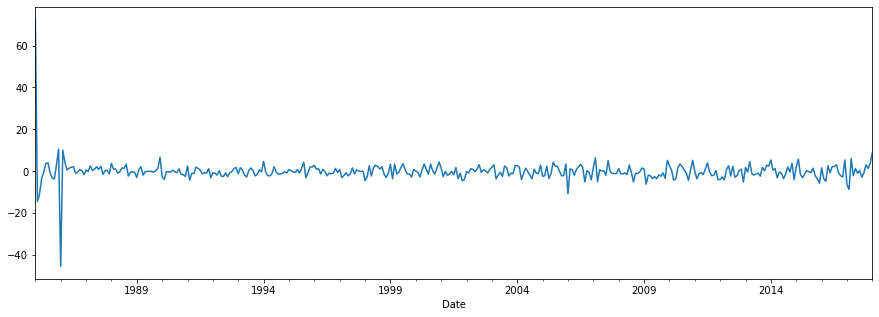

In [35]:
plt.figure(figsize=(15,5))
results.resid.plot()

<AxesSubplot:ylabel='Density'>

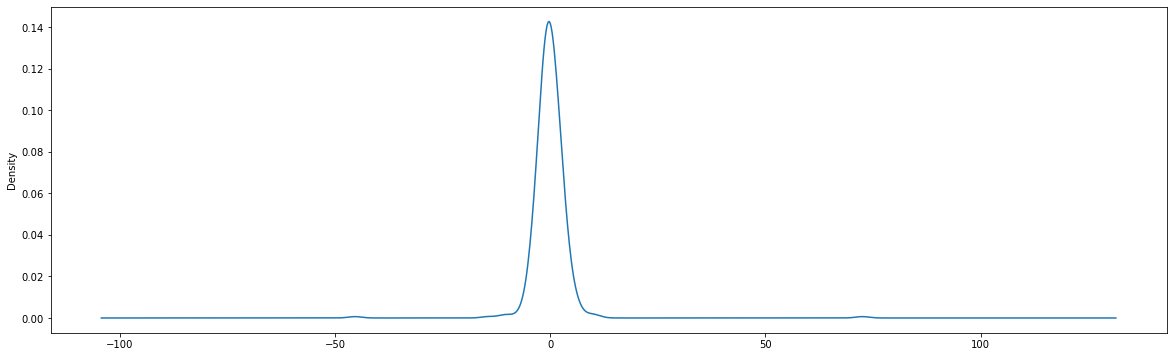

In [36]:
results.resid.plot(kind='kde')

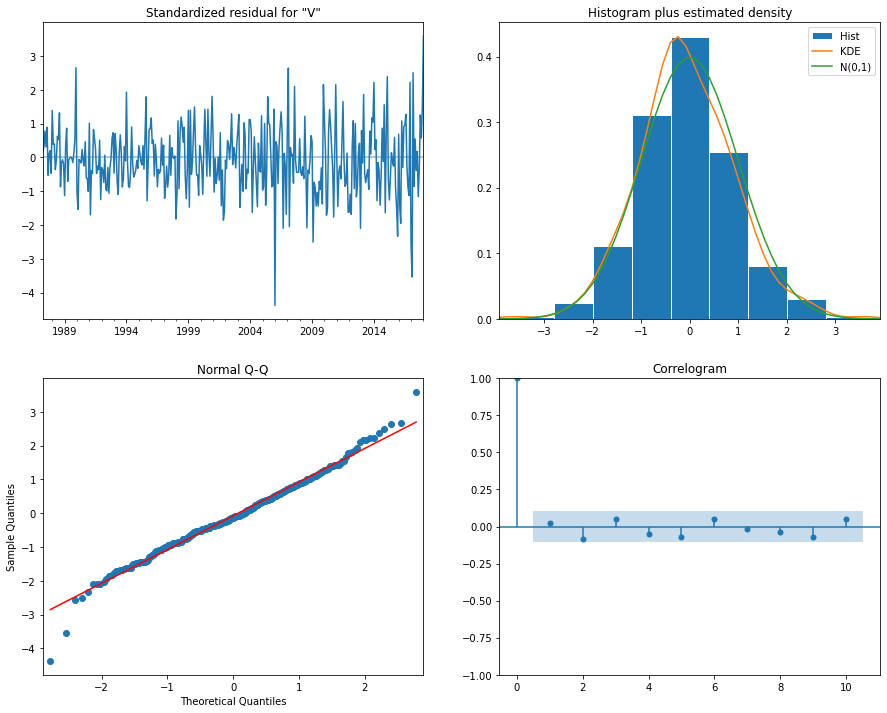

In [37]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [44]:
# Get forecast of 10 years or 120 months steps ahead in future
forecast = results.get_forecast(steps= 120)
# Get confidence intervals of forecasts
forecast_ci = forecast.conf_int()
forecast_ci

,lower Value,upper Value
2018-02-01,109.485619,119.061210
2018-03-01,99.512463,110.531149
2018-04-01,86.956478,98.456779
2018-05-01,88.247473,99.949544
2018-06-01,98.731406,110.538665
...,...,...
2027-09-01,92.673343,121.080593
2027-10-01,84.514593,113.072616
2027-11-01,87.705332,116.412768
2027-12-01,102.937605,131.793384


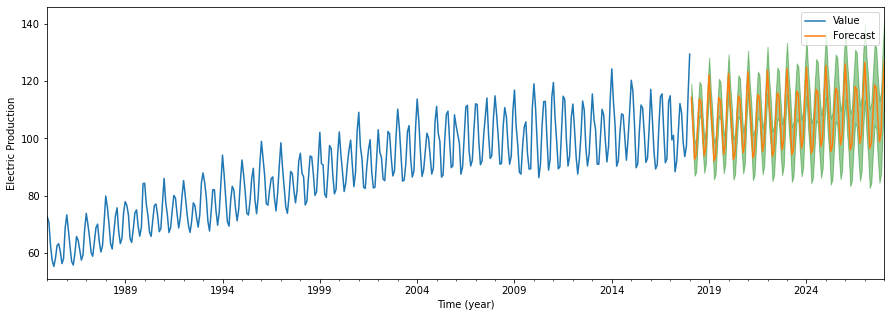

In [45]:
ax = data.plot(label='observed', figsize=(15, 5))
forecast.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(forecast_ci.index,forecast_ci.iloc[:, 0],forecast_ci.iloc[:, 1], color='g', alpha=.4)
ax.set_xlabel('Time (year)')
ax.set_ylabel('Electric Production')

plt.legend()
plt.show()

In [46]:
pred = results.get_prediction(start = 370, end = 500, dynamic=False)
pred_ci = pred.conf_int()
pred_ci.head()

,lower Value,upper Value
2015-11-01,91.915303,101.490894
2015-12-01,104.129314,113.704906
2016-01-01,110.622325,120.197916
2016-02-01,105.379851,114.955442
2016-03-01,95.326489,104.902080


<Figure size 1080x360 with 0 Axes>

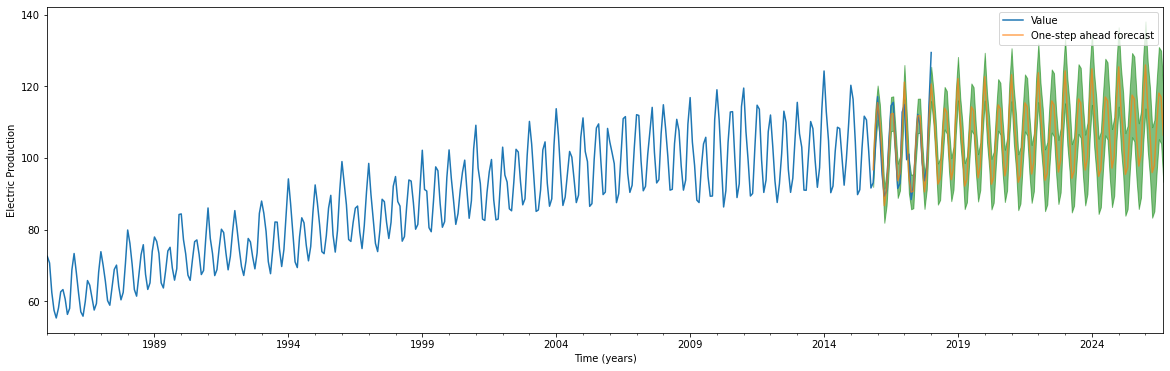

In [51]:
plt.figure(figsize=(15,5))
ax = data['1985':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.7)

ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='g', alpha=.5)

ax.set_xlabel('Time (years)')
ax.set_ylabel('Electric Production')
plt.legend()

plt.show()

In [61]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2013-01-01'), dynamic=True, full_results=True)
result=sm.tsa.statespace.SARIMAX(train_df,order=(1,0,0),seasonal_order=(1,0,1,12),enforce_stationarity=False,enforce_invertibility=False).fit()
pred_dynamic_ci = pred_dynamic.conf_int()

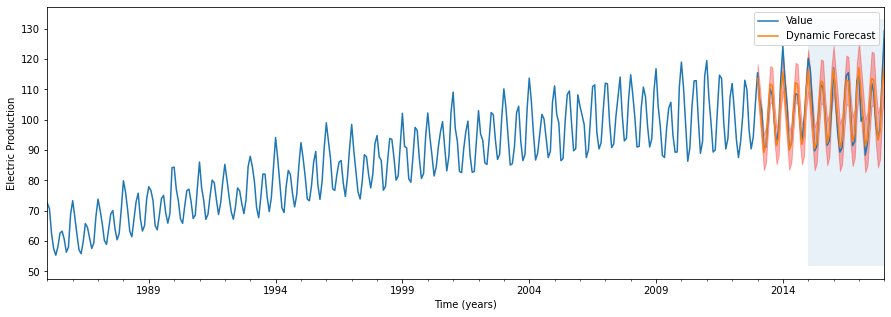

In [62]:
ax = data['1985':].plot(label='observed', figsize=(15, 5))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], 
                color='r', 
                alpha=.3)

ax.fill_betweenx(ax.get_ylim(), 
                 pd.to_datetime('2015-01-31'), 
                 data.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time (years)')
ax.set_ylabel('Electric Production')

plt.legend()
plt.show()

In [63]:
predictions = result.predict(start=len(train_df), end=len(train_df)+len(test_df)-1, dynamic=False)
sarima_score = mean_squared_error(test_df, predictions)
print('SARIMA MSE: {}'.format(round(sarima_score,4)))

SARIMA MSE: 0.0012


In [64]:
model_errors = pd.DataFrame()
model_errors["Model"] = ["Autoregression", "Moving Average", "ARIMA","SARIMA"]
model_errors["MSE"] = [ar_score, MovingAvg_score, arima_score,sarima_score]
model_errors = model_errors.sort_values("MSE", ascending = True, ignore_index = True)
model_errors.index = model_errors.Model
del model_errors["Model"]

model_errors

,MSE
Model,
SARIMA,0.001167
ARIMA,0.004172
Autoregression,0.007904
Moving Average,0.008520


### Conclusion

Here, we first loaded the electricity production dataset and converted it to a time series dataset. Then, we checked for stationarity and got to know it is non-stationary. Converted this to stationary data. Then we implemented ARIMA and SARIMA and we got the forecast value with the least error. From the above table, we can see that both ARIMA and SARIMA gave the minimum MSE.